In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

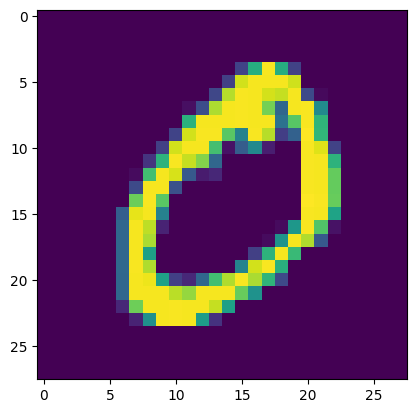

In [10]:
plt.imshow(X_train[1])

In [11]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

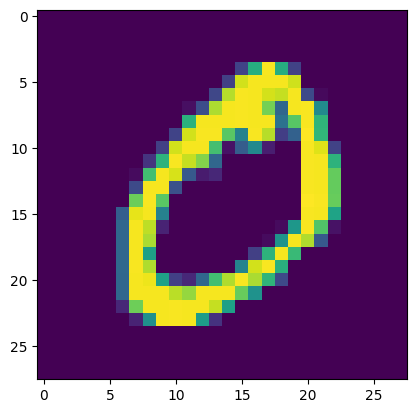

In [12]:
plt.imshow(X_train[1])

In [15]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['Accuracy'])

In [20]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9165 - loss: 0.2900 - val_Accuracy: 0.9531 - val_loss: 0.1626
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.9626 - loss: 0.1293 - val_Accuracy: 0.9647 - val_loss: 0.1186
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.9738 - loss: 0.0892 - val_Accuracy: 0.9682 - val_loss: 0.1043
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.9807 - loss: 0.0653 - val_Accuracy: 0.9696 - val_loss: 0.0968
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9858 - loss: 0.0491 - val_Accuracy: 0.9739 - val_loss: 0.0884
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9882 - loss: 0.0384 - val_Accuracy: 0.9737 - val_loss: 0.0868
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.9906 - loss: 0.0312 - val_Accuracy: 0.9750 - val_loss: 0.0883
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.9925 - loss: 0.0235 - 

In [26]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [27]:
y_pred=y_prob.argmax(axis=1)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
accuracy_score(y_test,y_pred)

0.9772

In [30]:
confusion_matrix(y_test,y_pred)

array([[ 974,    1,    1,    0,    0,    1,    1,    1,    1,    0],
       [   0, 1128,    2,    1,    0,    0,    0,    1,    3,    0],
       [   4,    1, 1004,    5,    3,    0,    2,    9,    4,    0],
       [   1,    0,    0,  996,    0,    2,    1,    5,    4,    1],
       [   1,    0,    3,    0,  963,    0,    3,    3,    1,    8],
       [   4,    0,    0,   15,    1,  857,    4,    3,    5,    3],
       [  10,    3,    3,    1,    2,    4,  935,    0,    0,    0],
       [   1,    3,    8,    4,    0,    0,    0, 1004,    2,    6],
       [   7,    1,    6,    6,    2,    1,    2,    5,  940,    4],
       [   3,    6,    1,    9,    9,    1,    1,    7,    1,  971]])